In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Import coefficients for n-gramms

In [3]:
df = pd.read_excel('LinearSVM_char_word_coeffs.xlsx')

In [4]:
df = df.set_index('feature')

In [5]:
N = 1000
top_features = (
    df.abs()
    .max(axis=1)
    .sort_values(ascending=False)
    .head(N)
    .index
)

top_importance_df = df.loc[top_features]

In [6]:
top_importance_df

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__ак,4.607144,-0.594151,-0.784015,-1.358233,-0.457673,-1.006811,-0.889393,-0.760966,-0.735451,-6.423973e-01
char__ дак,3.236317,-0.581024,-0.356685,-0.281892,-0.513290,-0.675492,-0.840081,-0.715970,-0.663303,-7.051201e-01
word__ле,2.485597,-0.387744,-0.214217,-0.676488,-0.436879,-0.509159,-0.400682,-0.388175,-0.579586,-5.939947e-01
word__ужо,-0.250047,2.324064,-0.465897,-0.500722,-0.526961,-0.293724,-0.332234,-0.395247,-0.434694,-2.712461e-01
word__мена,-0.240287,-0.621976,-0.319585,-0.371645,-0.505922,-0.624446,-0.388432,0.120858,2.224437,-5.475283e-01
...,...,...,...,...,...,...,...,...,...,...
word__страшный,-0.221547,0.898186,0.048516,-0.106212,-0.110126,-0.013629,-0.151319,-0.291379,-0.209540,-3.260712e-02
word__нитка,0.028864,0.138399,-0.283259,-0.135497,-0.140630,-0.034607,-0.151483,-0.135376,-0.041012,8.981176e-01
word__вот праздник,-0.163084,-0.029094,-0.408326,0.897852,0.107581,0.246712,-0.053387,-0.492171,-0.176742,-8.673617e-19


# Show the most important features for each group

In [7]:
target_class = 'Pskovskie'
mask = (
    (df[target_class] > 0.5) &  # сильно положительное влияние
    (df.drop(columns=[target_class]).max(axis=1) < 0)  # отрицательное или нулевое в остальных
)

exclusive_features = df[mask].sort_values(by=target_class, ascending=False)
pd.set_option("display.max_rows", None)
display(exclusive_features)
exclusive_features.to_excel('Pskovskie_features_SVM.xlsx')

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__оны,-2.575925e-02,-1.732116e-01,-3.162906e-01,-1.816198e-01,-1.907951e-01,-2.305807e-01,-0.178564,1.351933,-1.746621e-01,-2.253059e-01
word__тороп,-1.577267e-01,-2.385203e-01,-1.972356e-01,-4.022395e-01,-1.557356e-01,-3.506682e-01,-0.250233,1.322977,-6.343318e-02,-1.990021e-01
word__там тама,-9.019028e-02,-6.336747e-02,-1.725569e-01,-1.396404e-01,-7.116985e-02,-1.681338e-01,-0.121505,1.280875,-5.824716e-01,-8.969464e-02
word__не не пойти,-3.314018e-01,-8.757467e-02,-1.761273e-02,-8.595362e-02,-1.738324e-01,-6.430192e-02,-0.141373,1.262780,-1.079820e-01,-2.002321e-01
word__они оны,-2.588988e-02,-1.133135e-01,-3.178946e-01,-1.620187e-01,-1.852468e-01,-2.186057e-01,-0.179469,1.243844,-1.755479e-01,-1.771102e-01
word__не не надо,-3.432486e-02,-1.017724e-01,-2.096714e-01,-1.132104e-01,-2.247184e-02,-2.179979e-01,-0.171027,1.209919,-2.205035e-01,-1.465115e-01
char__в у,-4.796433e-02,-7.244344e-03,-5.479536e-04,-3.130745e-01,-1.396875e-01,-2.394617e-01,-0.090051,1.172865,-1.261494e-01,-2.952256e-01
word__опочка,-4.520998e-02,-1.102794e-01,-2.950537e-01,-3.007726e-01,-9.185997e-02,-1.270802e-01,-0.339201,1.147937,-1.294861e-01,-1.386327e-01
char__ в у,-4.828479e-02,-4.989962e-02,-1.614532e-02,-3.482213e-01,-1.562013e-01,-1.520843e-01,-0.117860,1.136596,-1.673346e-01,-2.569896e-01


In [8]:
target_class = 'Arkhangelskie'
mask = (
    (df[target_class] > 0.5) &  # сильно положительное влияние
    (df.drop(columns=[target_class]).max(axis=1) < 0)  # отрицательное или нулевое в остальных
)

exclusive_features = df[mask].sort_values(by=target_class, ascending=False)
display(exclusive_features)
exclusive_features.to_excel('Arkhangelskie_features_SVM.xlsx')

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__ак,4.607144,-5.941506e-01,-7.840150e-01,-1.358233,-4.576731e-01,-1.006811e+00,-0.889393,-0.760966,-7.354507e-01,-0.642397
char__ дак,3.236317,-5.810240e-01,-3.566850e-01,-0.281892,-5.132905e-01,-6.754915e-01,-0.840081,-0.715970,-6.633028e-01,-0.705120
word__ле,2.485597,-3.877443e-01,-2.142167e-01,-0.676488,-4.368790e-01,-5.091585e-01,-0.400682,-0.388175,-5.795862e-01,-0.593995
word__этто,1.605044,-2.372909e-01,-2.922885e-01,-0.496305,-2.354469e-01,-1.221117e-01,-0.464441,-0.313767,-2.804226e-01,-0.222624
char__ле,1.554739,-6.549778e-02,-3.417735e-01,-0.211865,-1.856203e-01,-3.287532e-01,-0.135970,-0.271641,-2.390110e-01,-0.424453
word__ишь,1.478536,-2.512846e-01,-1.481341e-01,-0.480265,-7.883897e-02,-1.821996e-01,-0.336749,-0.173258,-9.450825e-02,-0.366819
word__оне,1.405197,-8.018485e-02,-1.320378e-01,-0.375847,-2.667032e-01,-1.706418e-01,-0.399393,-0.174734,-1.492235e-01,-0.135982
char__ ак,1.369147,-3.883039e-04,-3.481668e-02,-0.437568,-2.120160e-01,-3.814800e-01,-0.196130,-0.312962,-2.850206e-01,-0.257822
char__ ак,1.353094,-2.325842e-01,-1.249518e-01,-0.377911,-7.924634e-02,-3.516143e-01,-0.271078,-0.253534,-2.883603e-01,-0.232189


In [9]:
target_class = 'Desninskie'
mask = (
    (df[target_class] > 0.5) &  # сильно положительное влияние
    (df.drop(columns=[target_class]).max(axis=1) < 0)  # отрицательное или нулевое в остальных
)

exclusive_features = df[mask].sort_values(by=target_class, ascending=False)
display(exclusive_features)
exclusive_features.to_excel('Desninskie_features_SVM.xlsx')

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__ужо,-2.500471e-01,2.324064,-0.465897,-5.007215e-01,-5.269615e-01,-2.937243e-01,-3.322337e-01,-3.952471e-01,-4.346942e-01,-2.712461e-01
char__жо,-5.768380e-02,1.353458,-0.297788,-2.855049e-01,-2.897551e-01,-1.562394e-01,-2.566407e-01,-1.226663e-01,-2.481439e-01,-1.334829e-01
word__ну понять,-6.938894e-18,1.351966,-0.132236,-4.779403e-02,-9.788926e-01,-4.585313e-02,-2.079149e-02,-6.226150e-02,-1.618228e-01,-8.250657e-03
char__ ужо,-1.450004e-01,1.281385,-0.240627,-2.652573e-01,-3.001977e-01,-1.633987e-01,-1.870354e-01,-2.187931e-01,-2.492492e-01,-1.567875e-01
char__ ужо,-1.382525e-01,1.143684,-0.198488,-2.181068e-01,-2.505540e-01,-1.512263e-01,-1.869617e-01,-1.815223e-01,-2.335981e-01,-1.174809e-01
char__ужо,-1.025392e-01,1.142311,-0.215791,-2.453836e-01,-2.494853e-01,-1.581516e-01,-1.861642e-01,-1.807480e-01,-2.326017e-01,-1.169798e-01
word__миша,-1.024372e-01,1.110600,-0.196845,-8.203452e-02,-3.118457e-01,-9.286407e-02,-6.787266e-02,-2.516190e-01,-1.271265e-01,-1.005818e-01
word__деточка,-4.063128e-02,1.097997,-0.095489,-3.688461e-01,-3.987158e-01,-3.183061e-01,-2.425647e-01,-2.043331e-01,-1.204670e-01,-5.994937e-02
word__калуга,-4.766733e-02,1.049367,-0.218505,-1.918093e-01,-1.842684e-01,-6.979798e-02,-2.194374e-01,-2.047809e-01,-6.626671e-02,-9.024376e-02


In [10]:
target_class = 'Donskie'
mask = (
    (df[target_class] > 0.5) &  # сильно положительное влияние
    (df.drop(columns=[target_class]).max(axis=1) < 0)  # отрицательное или нулевое в остальных
)

exclusive_features = df[mask].sort_values(by=target_class, ascending=False)
display(exclusive_features)
exclusive_features.to_excel('Donskie_features_SVM.xlsx')

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__дон,-1.462201e-01,-9.653620e-02,1.982021,-2.288674e-01,-4.366883e-01,-1.622813e-01,-5.088896e-01,-0.235494,-2.897683e-01,-3.579586e-01
word__травка,-2.974917e-02,-1.273436e-01,1.385499,-3.892343e-01,-2.943803e-01,-1.427954e-01,-1.983892e-01,-0.192476,-1.858898e-01,-1.691571e-01
word__значиться,-2.672233e-02,-1.297135e-01,1.261914,-3.343221e-01,-8.364127e-02,-1.116820e-01,-4.005716e-01,-0.082719,-1.929698e-01,-3.582421e-02
word__станица,-5.612931e-02,-2.445531e-01,1.164066,-1.979738e-01,-3.467608e-02,-1.293847e-01,-2.001735e-01,-0.316847,-1.026715e-01,-1.806491e-01
word__очень вкусно,-9.743780e-02,-1.013070e-01,1.139778,-2.998380e-01,-8.673617e-19,-6.405598e-02,-2.461723e-02,-0.491657,-4.392362e-02,-3.521885e-02
word__тогда ходить,-3.138220e-03,-2.016011e-02,1.121999,-8.400809e-02,-6.004476e-01,-8.823358e-03,-1.321281e-01,-0.126934,-1.803128e-02,-7.834722e-03
word__шахта,-1.317734e-01,-1.097059e-01,1.072797,-1.659867e-01,-1.460950e-01,-1.854480e-01,-2.102390e-01,-0.293204,-6.314427e-02,-2.826356e-01
word__жить не быть,-5.654826e-02,-2.283102e-02,1.036786,-2.123924e-01,-1.320518e-01,-3.094733e-02,-2.979813e-01,-0.223822,-1.354527e-02,-5.900992e-02
word__поломать,-7.656505e-02,-1.457440e-01,1.033303,-1.606116e-01,-4.155778e-01,-1.711445e-01,-9.101969e-03,-0.197217,-4.098753e-02,-1.962714e-01


In [11]:
target_class = 'Kostromskie'
mask = (
    (df[target_class] > 0.5) &  # сильно положительное влияние
    (df.drop(columns=[target_class]).max(axis=1) < 0)  # отрицательное или нулевое в остальных
)

exclusive_features = df[mask].sort_values(by=target_class, ascending=False)
display(exclusive_features)
exclusive_features.to_excel('Kostromskie_features_SVM.xlsx')

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__поток,-3.707623e-01,-2.799180e-01,-3.482309e-01,1.896563,-1.752120e-01,-3.049254e-01,-0.506479,-0.310608,-5.035852e-02,-3.484138e-01
word__на поток,-2.217394e-01,-2.161850e-01,-3.368378e-01,1.382432,-1.609831e-01,-1.765065e-01,-0.372035,-0.276719,-1.423940e-02,-2.637398e-01
word__молиться,-2.600804e-01,-1.214835e-01,-5.103060e-01,1.336741,-3.777840e-01,-7.790521e-02,-0.301326,-0.399538,-3.011864e-01,-2.687830e-01
word__голова заболеть,-1.540576e-01,-1.055153e-01,-2.582380e-01,1.252847,-3.611865e-02,-1.973736e-01,-0.193130,-0.156157,-6.873960e-02,-2.388557e-01
char__поток,-2.277290e-01,-1.883707e-01,-2.184047e-01,1.213348,-1.367080e-01,-1.758858e-01,-0.283087,-0.237648,-2.755129e-02,-1.979409e-01
word__желанный,-2.371521e-01,-1.748059e-01,-2.932805e-01,1.192302,-1.154229e-01,-3.341077e-01,-0.300305,-0.230116,-2.184698e-01,-1.422690e-01
char__ пода,-7.254379e-02,-1.173338e-01,-4.824651e-01,1.157075,-2.163186e-01,-8.369063e-02,-0.050867,-0.291370,-1.567380e-01,-1.880089e-02
word__не больно,-3.672320e-01,-1.600751e-01,-1.345772e-01,1.149130,-8.920922e-03,-1.576587e-01,-0.216192,-0.167054,-2.568633e-02,-2.242101e-01
word__быть собираться,-4.043383e-02,-1.480513e-01,-1.802162e-01,1.119474,-1.259676e-01,-5.360798e-02,-0.380412,-0.274704,-7.165430e-02,-3.779941e-02


In [12]:
target_class = 'Mezhzonalnie'
mask = (
    (df[target_class] > 0.5) &  # сильно положительное влияние
    (df.drop(columns=[target_class]).max(axis=1) < 0)  # отрицательное или нулевое в остальных
)

exclusive_features = df[mask].sort_values(by=target_class, ascending=False)
display(exclusive_features)
exclusive_features.to_excel('Mezhzonalnie_features_SVM.xlsx')

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__рель,-5.487108e-02,-0.106960,-0.257459,-0.088952,1.200756,-5.734349e-02,-0.170020,-3.790023e-01,-7.192560e-02,-0.095744
word__хата,-2.713083e-01,-0.038155,-0.007611,-0.321705,1.156064,-2.848558e-01,-0.370194,-3.990013e-01,-4.538397e-01,-0.340526
word__этакий,-1.284155e-01,-0.131868,-0.171557,-0.354336,1.150983,-1.699387e-01,-0.197389,-1.607577e-01,-1.585831e-01,-0.236624
word__бурак,-1.860191e-01,-0.094151,-0.235134,-0.095406,1.109569,-3.958506e-02,-0.200907,-1.316169e-01,-9.383239e-02,-0.035375
word__постареть,-9.316213e-02,-0.088396,-0.278228,-0.196331,1.091116,-8.273230e-02,-0.078801,-6.655075e-02,-1.023631e-01,-0.169861
word__съестной,-4.817565e-02,-0.040206,-0.423870,-0.135144,1.036136,-1.507645e-02,-0.298062,-3.814327e-02,-1.925671e-02,-0.121732
word__веселка,-2.378926e-02,-0.111611,-0.113366,-0.391451,0.985609,-6.002693e-02,-0.209164,-8.629532e-02,-9.514482e-02,-0.040415
word__на поезд,-1.004083e-02,-0.066493,-0.243278,-0.160040,0.977110,-2.239272e-01,-0.050818,-2.343199e-01,-4.137794e-03,-0.007701
word__батя,-8.783770e-02,-0.103343,-0.148710,-0.043879,0.968558,-1.091852e-01,-0.061890,-1.530601e-01,-1.830443e-01,-0.105848


In [13]:
target_class = 'Novgorodskie'
mask = (
    (df[target_class] > 0.5) &  # сильно положительное влияние
    (df.drop(columns=[target_class]).max(axis=1) < 0)  # отрицательное или нулевое в остальных
)

exclusive_features = df[mask].sort_values(by=target_class, ascending=False)
display(exclusive_features)
exclusive_features.to_excel('Novgorodskie_features_SVM.xlsx')

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__да поехать,-1.265986e-01,-3.260772e-02,-3.752241e-01,-6.400832e-02,-3.535329e-01,1.320093,-1.844615e-01,-1.098177e-01,-3.704573e-02,-8.285951e-02
word__вот поглядеть,-3.794708e-19,-5.441765e-02,-3.241875e-01,-3.998458e-01,-2.421912e-01,1.290812,-1.995927e-01,-8.673617e-19,-1.782143e-01,-9.937363e-02
word__записываться,-3.298269e-02,-2.602085e-18,-3.523352e-01,-3.818993e-01,-7.693200e-02,1.276318,-3.519691e-02,-3.239663e-02,-8.102659e-02,-1.831750e-01
word__ааа,-5.916856e-03,-3.927931e-01,-1.633775e-01,-2.163157e-01,-1.981923e-01,1.161519,-1.815609e-01,-7.224141e-02,-4.293873e-02,-2.220159e-02
word__хотяж,-6.389656e-02,-1.285462e-01,-7.913774e-02,-2.138420e-01,-6.469433e-02,1.149439,-2.810383e-01,-1.584788e-01,-1.403685e-01,-1.252691e-01
word__лопата,-1.769781e-01,-1.956699e-01,-2.625019e-01,-2.365694e-01,-2.093409e-01,1.100180,-1.128860e-01,-3.945017e-02,-1.988045e-01,-8.159952e-02
word__дорогой мой,-7.461254e-02,-1.450341e-02,-5.673792e-02,-2.516076e-01,-1.351723e-01,1.075017,-7.626699e-02,-3.333802e-01,-2.212603e-01,-7.618163e-02
word__литва,-3.593258e-02,-4.436197e-02,-2.877170e-01,-1.889694e-01,-1.455234e-01,1.060797,-1.754421e-01,-1.402038e-01,-1.335907e-01,-1.034933e-01
word__неа,-4.635411e-02,-6.964622e-02,-2.450075e-01,-1.787693e-01,-1.198904e-01,1.060303,-2.790003e-01,-1.390295e-01,-4.767842e-02,-6.076539e-02


In [14]:
target_class = 'Povolzkie'
mask = (
    (df[target_class] > 0.5) &  # сильно положительное влияние
    (df.drop(columns=[target_class]).max(axis=1) < 0)  # отрицательное или нулевое в остальных
)

exclusive_features = df[mask].sort_values(by=target_class, ascending=False)
display(exclusive_features)
exclusive_features.to_excel('Povolzkie_features_SVM.xlsx')

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__южа,-0.103336,-6.978717e-02,-1.275524e-01,-2.845198e-01,-2.526009e-01,-1.147928e-01,1.219808,-1.808018e-01,-1.568951e-01,-2.216620e-01
word__шуя,-0.110693,-1.645396e-01,-2.067329e-01,-2.176419e-01,-4.120644e-02,-8.737244e-02,1.211308,-1.680061e-01,-2.194174e-01,-1.699379e-01
word__поросенок держать,-0.028125,-1.418054e-01,-1.597719e-01,-4.146957e-01,-1.073246e-01,-4.758119e-02,1.121026,-3.170174e-01,-2.287070e-02,-1.734434e-02
word__да видеть,-0.214598,-3.787423e-02,-8.268203e-03,-2.231238e-01,-1.067824e-01,-9.467582e-02,1.104613,-2.116760e-01,-2.288265e-01,-7.273582e-02
word__нина владимирович,-0.000512,-2.048151e-01,-1.290395e-01,-2.704852e-01,-9.213507e-03,-3.113223e-01,1.082562,-5.946688e-02,-8.673617e-19,-1.525030e-01
word__весь играть,-0.068020,-3.140452e-02,-4.196900e-01,-4.217444e-01,-4.228193e-02,-2.563140e-02,1.044385,-1.477509e-01,-6.598141e-02,-6.399942e-03
word__мой дед,-0.036474,-3.345465e-02,-2.882160e-01,-4.532312e-02,-1.914170e-01,-1.130706e-01,1.004575,-2.545375e-01,-4.402989e-02,-5.531490e-02
word__брат тоже,-0.278901,-4.961940e-02,-6.263251e-02,-1.316979e-01,-3.741038e-02,-2.378774e-01,1.000000,-2.439135e-01,-1.009657e-02,-5.726182e-02
word__три дом,-0.084188,-7.293440e-02,-5.518814e-03,-1.047277e-01,-1.347423e-03,-1.469753e-01,0.978298,-2.795292e-01,-2.201998e-01,-5.123029e-02


In [15]:
target_class = 'Ryazanskie'
mask = (
    (df[target_class] > 0.5) &  # сильно положительное влияние
    (df.drop(columns=[target_class]).max(axis=1) < 0)  # отрицательное или нулевое в остальных
)

exclusive_features = df[mask].sort_values(by=target_class, ascending=False)
display(exclusive_features)
exclusive_features.to_excel('Ryazanskie_features_SVM.xlsx')

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__прям,-2.258716e-01,-0.275672,-0.348695,-4.481736e-01,-9.854899e-03,-6.573102e-02,-2.264181e-01,-0.574106,1.666004,-3.131420e-01
word__стать быть,-1.263825e-01,-0.242281,-0.133243,-2.241937e-01,-3.866953e-02,-1.431099e-01,-2.500651e-01,-0.366520,1.428792,-1.099923e-01
word__тогды,-1.601015e-01,-0.294057,-0.079884,-8.712925e-02,-3.940530e-01,-2.410325e-01,-1.385898e-01,-0.111994,1.321845,-1.701720e-01
word__ничто не дать,-1.590800e-01,-0.026487,-0.008225,-4.152286e-01,-1.602363e-01,-4.336809e-19,-8.607578e-02,-0.335347,1.295476,-1.057097e-18
char__у мен,-3.022239e-01,-0.202364,-0.103876,-9.342329e-02,-2.078754e-01,-3.106738e-01,-1.313318e-01,-0.264562,1.260089,-2.560465e-01
word__старший быть,-2.023614e-02,-0.129668,-0.124203,-5.365983e-02,-2.378941e-01,-1.434260e-01,-2.377762e-01,-0.144110,1.197497,-1.270410e-01
char__ у ме,-2.782472e-01,-0.198281,-0.011684,-9.359040e-02,-2.240567e-01,-2.960739e-01,-1.273761e-01,-0.262345,1.170069,-2.463278e-01
char__у ме,-3.096905e-01,-0.198217,-0.018506,-1.330309e-01,-4.255291e-02,-2.937170e-01,-2.256823e-01,-0.187216,1.106463,-2.837859e-01
word__перегородить,-5.919475e-03,-0.005614,-0.203607,-1.078416e-01,-3.755407e-02,-7.335951e-02,-3.882478e-01,-0.163470,1.051768,-8.723963e-03


In [16]:
target_class = 'Seligerskie'
mask = (
    (df[target_class] > 0.5) &  # сильно положительное влияние
    (df.drop(columns=[target_class]).max(axis=1) < 0)  # отрицательное или нулевое в остальных
)

exclusive_features = df[mask].sort_values(by=target_class, ascending=False)
display(exclusive_features)
exclusive_features.to_excel('Seligerskie_features_SVM.xlsx')

,Arkhangelskie,Desninskie,Donskie,Kostromskie,Mezhzonalnie,Novgorodskie,Povolzkie,Pskovskie,Ryazanskie,Seligerskie
feature,,,,,,,,,,
word__эво,-0.225721,-1.831364e-01,-0.261251,-0.436012,-0.373470,-0.422494,-3.269034e-01,-0.444688,-3.053683e-01,2.155468
word__волочек,-0.207688,-1.504194e-01,-0.254097,-0.117570,-0.069030,-0.188384,-2.092850e-01,-0.252446,-1.625809e-01,1.287348
char__эво,-0.072451,-1.005314e-01,-0.127236,-0.212092,-0.200447,-0.222764,-1.795384e-01,-0.231524,-1.625366e-01,1.066426
word__невкусный,-0.155752,-1.002865e-01,-0.237680,-0.184040,-0.015184,-0.040355,-1.911632e-02,-0.153167,-3.736465e-02,1.011888
word__вот смотреть,-0.084723,-4.313427e-02,-0.298635,-0.163230,-0.012480,-0.175586,-1.042085e-01,-0.280824,-1.888869e-01,0.975717
word__барсук,-0.127964,-6.493755e-02,-0.090761,-0.161305,-0.097126,-0.129667,-1.506863e-01,-0.219005,-1.461049e-01,0.961809
char__ лена,-0.026911,-2.008782e-03,-0.199301,-0.049253,-0.178295,-0.145453,-1.417724e-01,-0.142836,-1.647318e-01,0.867665
word__дедушка мороз,-0.017128,-1.009567e-01,-0.147815,-0.186596,-0.034572,-0.090989,-9.984907e-02,-0.033118,-1.418942e-02,0.864976
word__подпол,-0.124895,-4.479114e-02,-0.104570,-0.146024,-0.058586,-0.043998,-2.244825e-01,-0.142329,-6.076269e-02,0.863179


# Create similarity matrix based on 100 most important features

We use vectors of groups of dialects in which there are values for the 100 most significant n-gramms

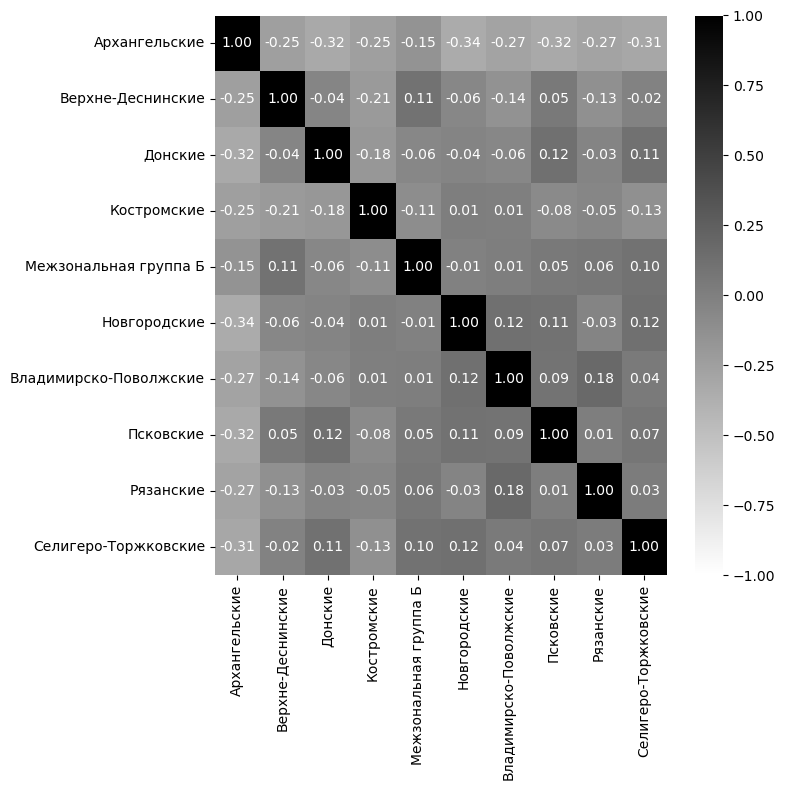

<Figure size 640x480 with 0 Axes>

In [135]:
N = 100
top_features = (
    df.abs()
    .max(axis=1)
    .sort_values(ascending=False)
    .head(N)
    .index
)

top_importance_df_10000 = df.loc[top_features]
class_vectors = top_importance_df_10000.T

similarity_matrix = cosine_similarity(class_vectors)
similarity_df = pd.DataFrame(similarity_matrix, index=class_vectors.index, columns=class_vectors.index)
labs = ['Архангельские', 'Верхне-Деснинские', 'Донские', 'Костромские', 'Межзональная группа Б', 
        'Новгородские', 'Владимирско-Поволжские', 'Псковские', 'Рязанские', 'Селигеро-Торжковские']
plt.figure(figsize=(8, 8))
sns.heatmap(similarity_df, annot=True, cmap="binary", vmin=-1, vmax=1, fmt=".2f", xticklabels=labs, yticklabels=labs)
plt.tight_layout()
plt.show()
plt.savefig('heatmap_coeff_100.jpg', bbox_inches='tight')

# Create similarity matrix based on all n-gramms

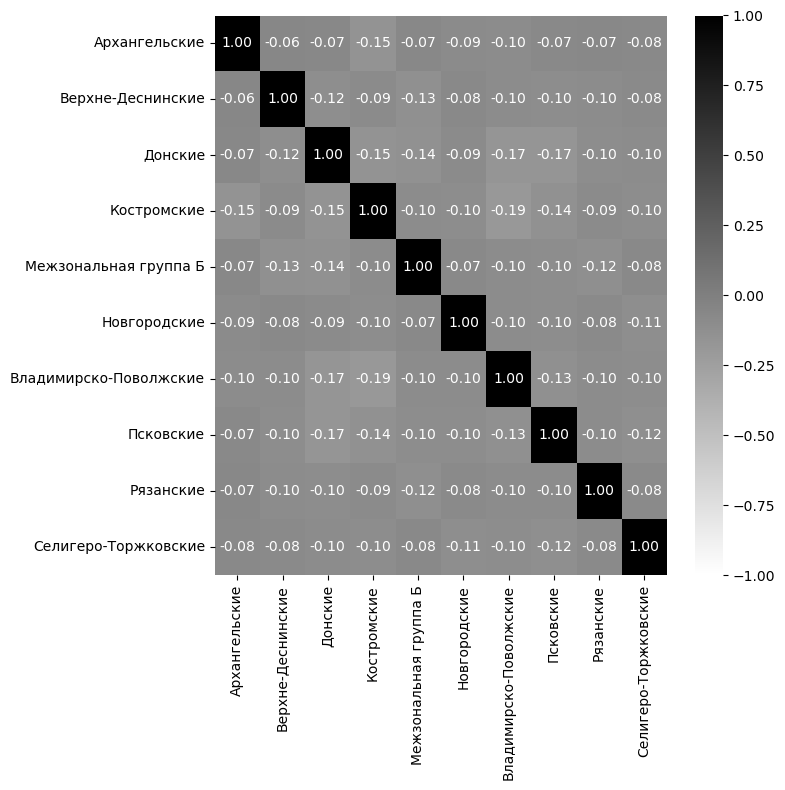

<Figure size 640x480 with 0 Axes>

In [137]:
class_vectors = df.T

similarity_matrix = cosine_similarity(class_vectors)
similarity_df = pd.DataFrame(similarity_matrix, index=class_vectors.index, columns=class_vectors.index)
labs = ['Архангельские', 'Верхне-Деснинские', 'Донские', 'Костромские', 'Межзональная группа Б', 
        'Новгородские', 'Владимирско-Поволжские', 'Псковские', 'Рязанские', 'Селигеро-Торжковские']
plt.figure(figsize=(8, 8))
sns.heatmap(similarity_df, annot=True, cmap="binary", vmin=-1, vmax=1, fmt=".2f", xticklabels=labs, yticklabels=labs)
plt.tight_layout()
plt.show()
plt.savefig('heatmap_coeff_1000.jpg', bbox_inches='tight')